## **MFCC Feature Extraction**

**Submitted By : Aayush Rao**

**Reg No       : 211058024**

### **MFCC Co-efficient :**
- MFCCs are a compact representation of the spectrum(When a waveform is represented by a summation of possibly infinite number of sinusoids) of an audio signal.
- MFCC coefficients contain information about the rate changes in the different spectrum bands.
- Delta Parameter represents the change in MFCC Co-efficients. Computed by taking the first order derivative of the co-efficients.
- Delta Delta Parameter represents the change in delta parameter. Computed by taking first order derivative of the delta parameter or by taking second order derivative of the MFCC co-efficients.

### **MFCC Feature Extraction :**
The MFCC feature extraction process is basically a 6-step process:
1. Frame the signal into short frames :
We need to split the signal into short-time frames. The rationale behind this step is that frequencies in a signal change over time, so in most cases it doesn’t make sense to do the Fourier transform across the entire signal in that we would lose the frequency contours of the signal over time. Frame the signal into 20–40 ms frames. 25ms is standard. This means the frame length for a 16kHz signal is 0.025*16000 = 400 samples with a sample hop length of 160 samples.
2. Windowing : Windowing is essentially applied to notably counteract the assumption made by the Fast Fourier Transform that the data is infinite and to reduce spectral leakage.

3. Calculation of the Discrete Fourier Transform.
We can now do an NN-point FFT on each frame to calculate the frequency spectrum, which is also called Short-Time Fourier-Transform (STFT), where NN is typically 256 or 512, NFFT = 512 and then compute the power spectrum (periodogram).  
Periodogram : An estimate of the spectral density of a signal.
4. Applying Filter Banks :
The Mel spaced Filter Bank as stated formally is a set of 20–40 triangular filters. Two adjacent filters are described below:
Our filterbank comes in the form of 40 vectors of length 257 (assuming the FFT settings fom step 2). Each vector is mostly zeros, but is non-zero for a certain section of the spectrum. To calculate filterbank energies we multiply each filterbank with the power spectrum, then add up the coefficents. Once this is performed we are left with 40 numbers that give us an indication of how much energy was in each filterbank.
To Get the filterbanks shown in the above figure:
a) we first have to choose a lower and upper frequency. Good values are 300Hz for the lower and 8000Hz for the upper frequency.
b) convert the upper and lower frequencies to Mels. In our case 300Hz is 401.25 Mels and 8000Hz is 2834.99 Mels.
The Frequency to MEL conversion is super easy as every formula is available for it!
c)This gives us 40 coefficients(according to requirement, can be any number), between the selected range.
d)These coefficients are then converted back to hertz
e)And the filter bank is plotted using these points!

5. We now apply the log of these spectrogram values to get the log filterbank energies.
6. Don’t forget to mention that this process is optional and can be ignored but the resultant is still better if this is applied.
The issues with this spectrogram is that these Filter bank coefficients are highly correlated So, we need to decorrelate these coefficients.So for this DCT (Discrete cosine transform) is applied.Also to mention that the MFCC feature vector describes only the power spectral envelope of a single frame.The resultant list of numbers or the coefficients are termed as the MFCC’s or the Mel Frequency Cepstrum Coefficients!

### **Applications :**
- MFCCs are commonly used as features in speech recognition systems, such as the systems which can automatically recognize numbers spoken into a telephone.

- MFCCs are also increasingly finding uses in music information retrieval applications such as genre classification, audio similarity measures, etc
  
Links

- https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
- https://medium.com/@tanveer9812/mfccs-made-easy-7ef383006040


In [3]:
#Import libraries
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#Load audio file using librosa
signal , sr = librosa.load("duke.wav")

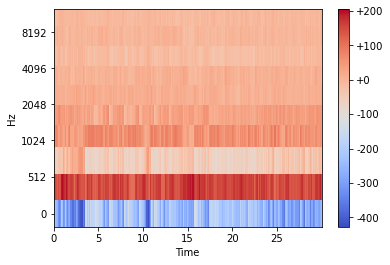

In [5]:
#MFCCs
mfccs = librosa.feature.mfcc(y = signal, sr=sr, n_mfcc = 10)
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.f")
plt.show()

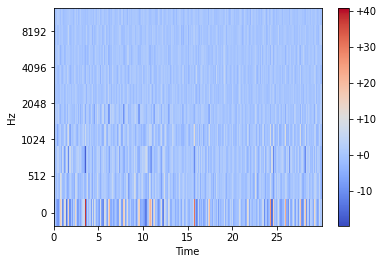

In [6]:
#Delta Parameter
delta = librosa.feature.delta(mfccs)
librosa.display.specshow(delta,sr = sr, x_axis='time' , y_axis='mel')
plt.colorbar(format="%+2.f")
plt.show()


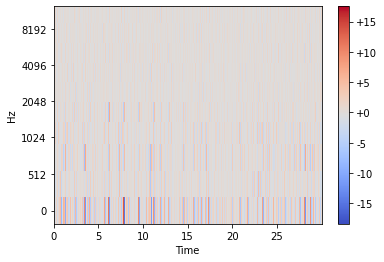

In [7]:
#Delta Delta Parameter
delta_delta = librosa.feature.delta(mfccs, order=2)
librosa.display.specshow(delta_delta,sr = sr, x_axis='time' , y_axis='mel')
plt.colorbar(format="%+2.f")
plt.show()